## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
# boston
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=42)

clf = DecisionTreeRegressor(
    criterion='mse',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [3]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  7.946807410968706


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.03477917 0.         0.00242088 0.         0.03076156 0.60931953
 0.00130373 0.0786226  0.01496082 0.         0.01147644 0.
 0.21635528]


In [6]:
# wine
wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=42)

clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [7]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.8888888888888888


In [8]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [9]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.         0.0172503  0.01863033 0.         0.         0.
 0.41093132 0.         0.         0.37754705 0.         0.
 0.175641  ]


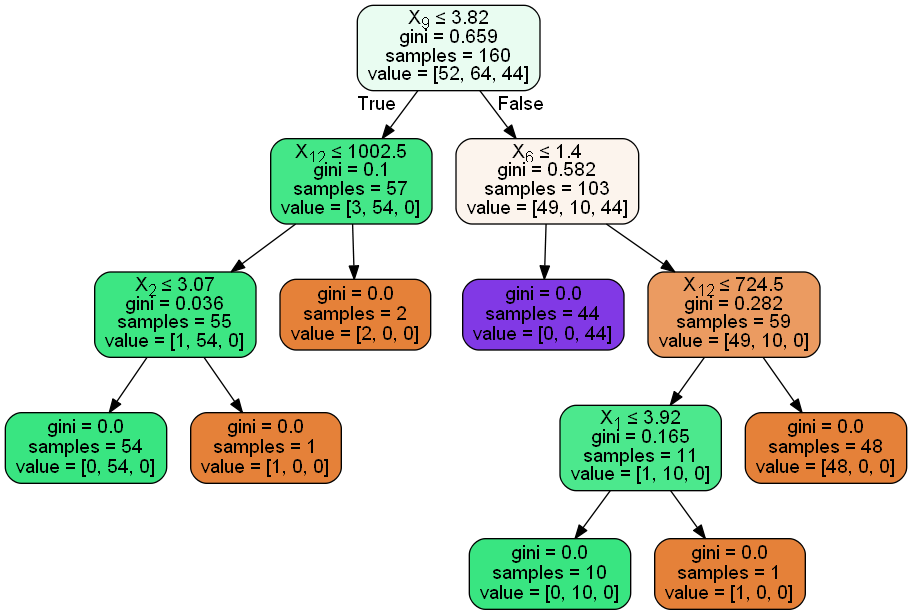

In [18]:
# 1. conda install pydotplus
# 2. conda install graphviz
# 3.手動增加 graphviz PATH 進 jupyter 環境變數
import os
os.environ['PATH'] = os.environ['PATH'] + (';C:\\tools\\Anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\\graphviz')

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
                                           
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())